In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)

%matplotlib inline

In [2]:
# Preprocessing Input data
data = pd.read_csv('../data.csv', header=None)

In [3]:
data.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


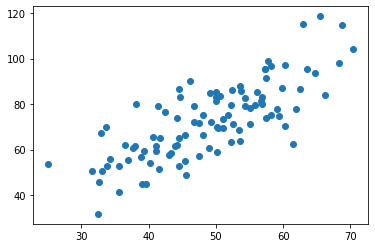

In [4]:
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
plt.scatter(X, Y)

In [5]:
def gradient_descent(X,y, learning_rate=0.001, epochs=100):
    # Define initial value
    weight = np.random.normal(0,0.1,1)[0] # initial weight
    prnt('initial weight',weight)
    bias = 0, # intial bias
    n = np.float(len(X))

    weight_lst = []
    bias_lst = []
    mae = []
    
    for i in range(epochs):
        
        y_hat = (weight * X)+ bias
        mae.append(round((1-np.mean(np.abs((y_hat - y) / y))) * 100, 2)) #Mean Absolute Percentage Accuracy
        
        D_m = (-2/n) * np.sum(X * (y - y_hat)) #derivative w.r.t weight
        D_c = (-2/n) * np.sum(y - y_hat) # Derivative w.r.t bias
        
        # new weigth and bias update
        weight_lst.append(weight)
        weight = weight - (learning_rate * D_m)
        
        bias_lst.append(bias)
        bias = bias - (learning_rate * D_c)
        
    return mae, weight_lst, bias_lst

In [31]:
epochs = 150
mae, weight, bias = gradient_descent(X,Y, learning_rate=0.00001, epochs=epochs)

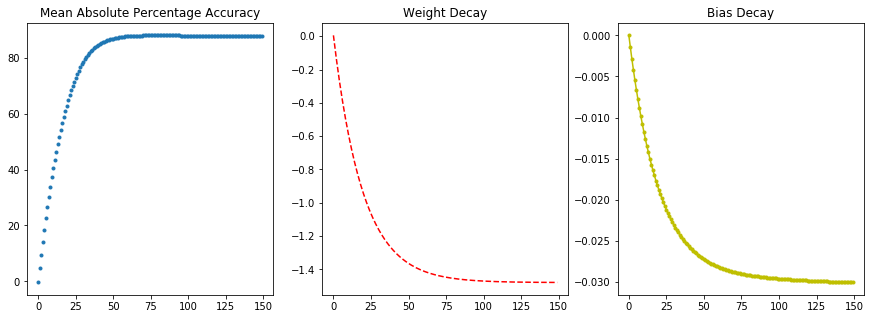

In [37]:
fig,ax  = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(range(epochs),mae,'.')
ax[0].title.set_text("Mean Absolute Percentage Accuracy")

ax[1].plot(range(epochs),-np.array(weight), 'r--')
ax[1].title.set_text("Weight Decay")

ax[2].plot(range(epochs),-np.array(bias), 'y.-')
ax[2].title.set_text("Bias Decay")


array([ 0.00523094, -0.06873669, -0.13901788, -0.20579636, -0.26924669,
       -0.32953476, -0.38681815, -0.44124662, -0.49296245, -0.54210084,
       -0.58879024, -0.6331527 , -0.67530421, -0.71535494, -0.7534096 ,
       -0.78956766, -0.82392366, -0.8565674 , -0.88758422, -0.91705521,
       -0.9450574 , -0.97166399, -0.99694455, -1.02096516, -1.04378861,
       -1.06547458, -1.08607974, -1.10565796, -1.12426043, -1.14193578,
       -1.1587302 , -1.17468762, -1.18984973, -1.20425618, -1.21794463,
       -1.23095087, -1.24330888, -1.25505099, -1.26620788, -1.27680872,
       -1.28688123, -1.29645173, -1.30554525, -1.31418556, -1.32239524,
       -1.33019575, -1.3376075 , -1.34464985, -1.35134121, -1.35769908,
       -1.36374008, -1.36947999, -1.37493384, -1.38011586, -1.38503962,
       -1.38971797, -1.39416316, -1.39838681, -1.40239994, -1.40621306,
       -1.40983614, -1.41327864, -1.41654957, -1.41965747, -1.42261047,
       -1.4254163 , -1.42808228, -1.43061538, -1.43302224, -1.43

In [13]:
np.argmax(mae)

77

In [24]:
# Do prediction based on optimized weigth and 
weight = np.repeat(weight[77],100)
bais = np.repeat(bias[77],100)

In [26]:
y_hat = weight*X + bais

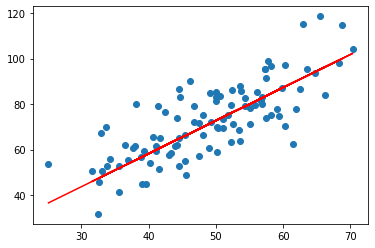

In [30]:
plt.scatter(X, Y)
plt.plot(X, y_hat, 'r')

# Logistic Regression

In [8]:
# introduction to sigmoid functions
def sigmoid(z):
    return round(1.0 / (1 + np.exp(-z)),2)

def derivative_sigmoid(z):
    f_x = round(1.0 / (1 + np.exp(-z)),2)
    return f_x*(1-f_x)

In [9]:
x = np.linspace(-10,10,100)
sigmoid_op = np.array([sigmoid(i) for i in x])
derivative = np.array([derivative_sigmoid(i) for i in x])

Text(0, 0.5, 'Y Axis')

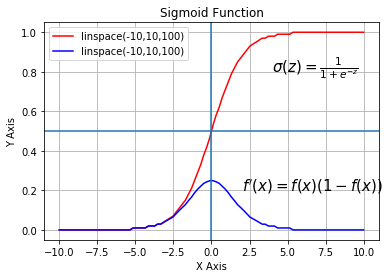

In [10]:
plt.plot(x, sigmoid_op,'r',label='linspace(-10,10,100)')
plt.plot(x, derivative,'b',label='linspace(-10,10,100)')

plt.axhline(0.5)
plt.axvline(0.0)
# Draw the grid line in background.
plt.grid()

# Title & Subtitle
plt.title('Sigmoid Function')

# place the legen boc in bottom right of the graph
plt.legend(loc='upper left')

# write the Sigmoid formula
plt.text(4, 0.8, r'$\sigma(z)=\frac{1}{1+e^{-z}}$', fontsize=15)
plt.text(2, 0.2, r"$f'(x)=f(x)(1-f(x))$", fontsize=15)

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

In [11]:
# Softmax function
def softmax(z):
    return round(np.exp(z) / np.sum(np.exp(z)),2)

C:\Users\msing140\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\msing140\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.8, 4, '$-\\log(1-z)$')

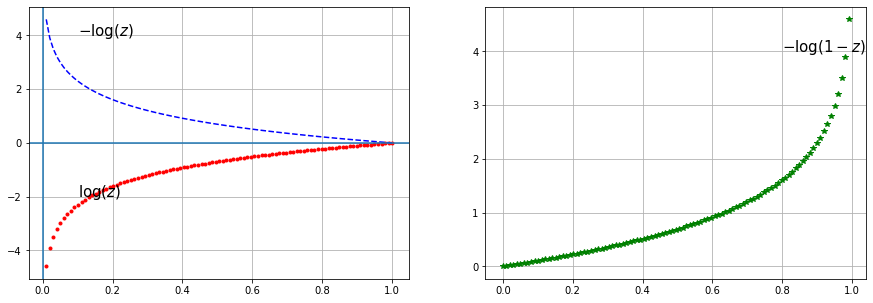

In [12]:
x = np.linspace(-0,1,100)
log = np.array([np.log(i) for i in x])
log_1 = np.array([np.log(1-i) for i in x])

fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x, log, 'r.')
ax[0].plot(x, -log, 'b--')
ax[0].axhline(0.0)
ax[0].axvline(0.0)
ax[1].plot(x, -log_1, 'g*')

# Draw the grid line in background.
ax[0].grid()
ax[1].grid()

# write the Sigmoid formula
ax[0].text(0.1, -2, r'$\log(z)$', fontsize=15)
ax[0].text(0.1, 4, r'$-\log(z)$', fontsize=15)
ax[1].text(0.8, 4, r'$-\log(1-z)$', fontsize=15)
